In [1]:
# Name: Homework #3 -- ECGR 4105
# Purpose: Classification Methods
# Author: Tim Johnson, Electrical Engineering Major, UNCC
# Date Created: November 1, 2021

In [2]:
# Import needed libraries
import numpy as np 
import matplotlib.pyplot as plot 
import pandas as pd 
from sklearn.datasets import load_breast_cancer

In [3]:
# Create variable for data storage
cancer = load_breast_cancer()
cancer_data = cancer.data

# Find shape
cancer_data.shape 

(569, 30)

In [4]:
# Format and output dataset
cancer_input = pd.DataFrame(cancer_data)
cancer_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
# Make a dependent variable for cancer outcome/label
cancer_labels = cancer.target

# Add cancer_labels column to dataset
labels = np.reshape(cancer_labels, (569, 1))
final_cancer_data = np.concatenate([cancer_data, labels], axis = 1)
cancer_dataset = pd.DataFrame(final_cancer_data)

In [6]:
# List the names of all the features
features = cancer.feature_names
features

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [7]:
# Add features and labels into matrix  
features_labels = np.append(features, 'label')

In [8]:
# Add the labels to the dataset format
cancer_dataset.columns = features_labels
cancer_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [9]:
#########################################################################################################
# PROBLEM 1

# Split dataset into independent and dependent variables
x = cancer_dataset.iloc[:, 0:29].values
y = cancer_dataset.iloc[:, 30].values

In [10]:
# Split dataset into training and test sets
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 5)

In [11]:
# Feature scale and standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [12]:
# Logistic regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0);
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Output first 9 predictions
y_pred[0:9]

array([0., 1., 1., 1., 1., 0., 1., 1., 1.])

In [13]:
# Make a confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[46,  2],
       [ 1, 65]], dtype=int64)

In [14]:
# Compute accuracy for problem 1
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9701492537313433
Recall: 0.9848484848484849


Text(0.5, 257.44, 'Predicted label')

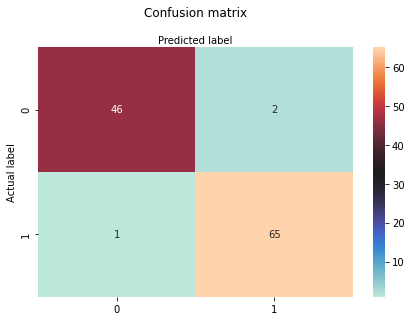

In [15]:
# Plot the confusion matrix
import seaborn as sns
class_names = [0,1] # name of classes
fig, ax = plot.subplots()
tick_marks = np.arange(len(class_names))
plot.xticks(tick_marks, class_names)
plot.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="icefire" ,fmt='g')
ax.xaxis.set_label_position("top")
plot.tight_layout()
plot.title('Confusion matrix', y=1.1)
plot.ylabel('Actual label')
plot.xlabel('Predicted label')

In [16]:
#########################################################################################################
# PROBLEM 2

# Split dataset into independent and dependent variables
x = cancer_dataset.iloc[:, 0:29].values
y = cancer_dataset.iloc[:, 30].values

# Standardizing the features
x = StandardScaler().fit_transform(x)


In [17]:
# Perform PCA analysis
from sklearn.decomposition import PCA 
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents 
             , columns = ['principal component 1', 'principal component 2'])

In [18]:
# Concatenate new principal components with dataset labels
finalDf = pd.concat([principalDf, cancer_dataset[['label']]], axis = 1)

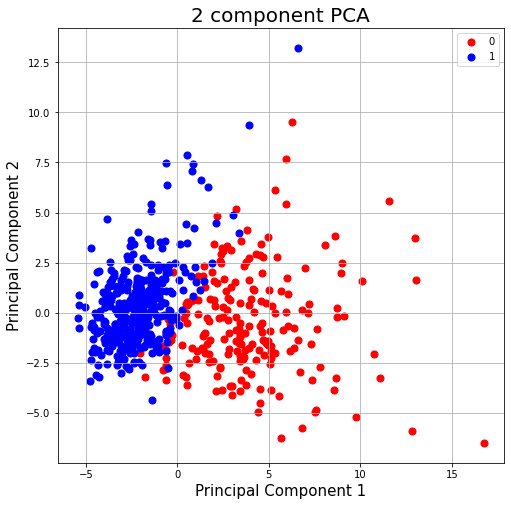

In [19]:
# Plot PCA data
fig = plot.figure(figsize = (8,8)) 
ax = fig.add_subplot(1,1,1)  
ax.set_xlabel('Principal Component 1', fontsize = 15) 
ax.set_ylabel('Principal Component 2', fontsize = 15) 
ax.set_title('2 component PCA', fontsize = 20) 
targets = [0, 1] 
colors = ['r', 'b'] 
for target, color in zip(targets,colors): 
    indicesToKeep = finalDf['label'] == target 
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'] 
               , finalDf.loc[indicesToKeep, 'principal component 2'] 
               , c = color 
               , s = 50) 
ax.legend(targets) 
ax.grid()

In [20]:
# Split into 80% training and 20% evaluation
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, train_size = 0.8, test_size = 0.2, random_state = 5)

# Scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0);
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [21]:
# Compute accuracy, precision, and recall
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.956140350877193
Precision: 0.9420289855072463
Recall: 0.9848484848484849


In [22]:
#########################################################################################################
# PROBLEM 3

# Split dataset into independent and dependent variables
x = cancer_dataset.iloc[:, 0:29].values
y = cancer_dataset.iloc[:, 30].values

# Standardizing the features 
x = StandardScaler().fit_transform(x)


In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Perform LDA analysis on data 
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(x, y)


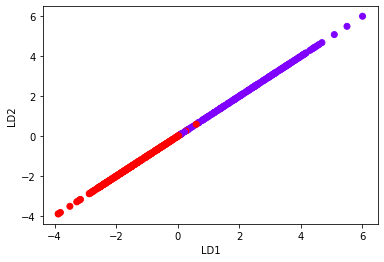

In [24]:
# Plot LDA linear line
plot.xlabel('LD1') 
plot.ylabel('LD2') 
plot.scatter(lda_t[:,0],lda_t[:,0],c=y,cmap='rainbow')

In [25]:
# Split data into 80% training and 20% evaluation
x_train, x_test, y_train, y_test = train_test_split(lda_t, y, train_size = 0.8, test_size = 0.2, random_state = 10)

# Feature scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Compute accuracy, precision, and recall
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9615384615384616
Recall: 1.0


In [26]:
#########################################################################################################
# PROBLEM 4

# Split dataset into independent and dependent variables
x = cancer_dataset.iloc[:, 0:29].values
y = cancer_dataset.iloc[:, 30].values

# Standardizing the features 
x = StandardScaler().fit_transform(x)


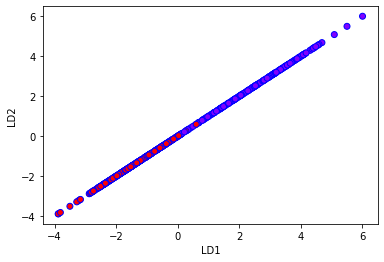

In [27]:
#Fitting LDA to wine dataset: 
lda = LinearDiscriminantAnalysis(n_components=1) 
lda_t = lda.fit_transform(x, y)

# Plot LDA linear line
plot.xlabel('LD1') 
plot.ylabel('LD2') 
plot.scatter(lda_t[:,0],lda_t[:,0],c=y,cmap='rainbow', edgecolors='b')

In [28]:
# Split data into 80% training and 20% evaluation
x_train, x_test, y_train, y_test = train_test_split(lda_t, y, train_size = 0.8, test_size = 0.2, random_state = 18)

# Feature scale data
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic regression on training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0);
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Compute accuracy, precision, and recall
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.9736842105263158
Precision: 0.9565217391304348
Recall: 1.0
